# Day005
## EDA: 資料分佈

以單變量分析來說，量化的分析方式可大致分為兩類
- 集中趨勢: 平均值(Mean)、中位數(Median)、眾數(Mode)
- 分散程度: 最小值(Min)、最大值(Max)、範圍(Range)、四分位差(Quartiles)、變異數(Variance)、標準差(Standar deviation)
使用上述的描述統計我們可以初步了解資料，並觀察是否有異常。


使用Python畫圖可以參考[matplotlib](https://matplotlib.org/gallery/index.html)和[seaborn](https://seaborn.pydata.org/examples/index.html)獲取靈感。

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../Data/Part01/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
# Display figure right in notebook
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
# Choose column AMT_INCOME_TOTAL
amtIncomeTotal = pd.DataFrame(app_train['AMT_INCOME_TOTAL'])

### Summary statistics 
使用[describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) 創造descriptive statistics總結central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [5]:
amtIncomeTotal.describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


### Skewness & Kurtosis
使用[skew](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.skew.html#pandas.DataFrame.skew)得到偏度，[kurtosis](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.kurtosis.html#pandas.DataFrame.kurtosis)得到峰度，注意兩者都有Normalized by N-1

In [6]:
skewness = amtIncomeTotal.skew()[0]
kurtosis = amtIncomeTotal.kurtosis()[0]
print(f"The skewness is {skewness}, kurtosis is {kurtosis}")

The skewness is 391.5596541041876, kurtosis is 191786.55438080415


### Histogram
使用pandas的[hist()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)會呼叫[matplotlib.pyplot.hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)，可以劃出直方圖

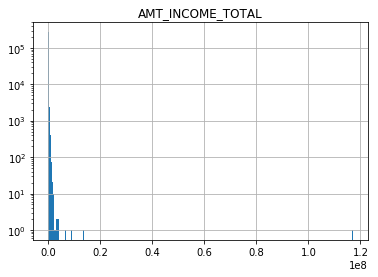

In [7]:
amtIncomeTotal.hist(bins=500, log=True)
plt.show()

> 由圖可以發現有outlier，且分布為postive skew

### Box-and-whisker diagram 
使用[boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)可畫出箱型圖。

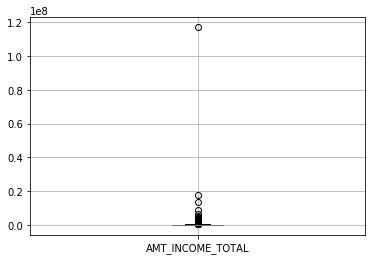

In [8]:
amtIncomeTotal.boxplot()